In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import wrangle

from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = wrangle.acquire_zillow()
df

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id.1,parcelid.1,logerror,transactiondate
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13,0,14297519,0.025595,2017-01-01
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13,1,17052889,0.055619,2017-01-01
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13,2,14186244,0.005383,2017-01-01
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13,3,12177905,-0.103410,2017-01-01
4,781532,12095076,1.0,NaN,NaN,3.0,4.0,NaN,9.0,3.0,...,2016.0,496619.0,9516.26,NaN,NaN,6.037461e+13,6,12095076,-0.001011,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52437,673515,11000655,NaN,NaN,NaN,2.0,2.0,NaN,6.0,2.0,...,2016.0,283704.0,4478.43,NaN,NaN,6.037101e+13,77609,11000655,0.020615,2017-09-20
52438,2968375,17239384,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,...,2016.0,16522.0,1107.48,NaN,NaN,6.111008e+13,77610,17239384,0.013209,2017-09-21
52439,1843709,12773139,1.0,NaN,NaN,1.0,3.0,NaN,4.0,1.0,...,2016.0,16749.0,876.43,NaN,NaN,6.037434e+13,77611,12773139,0.037129,2017-09-21
52440,1187175,12826780,NaN,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,2016.0,382000.0,6317.15,NaN,NaN,6.037503e+13,77612,12826780,0.007204,2017-09-25


In [3]:
df[df.isnull()==False].count()

id                          52442
parcelid                    52442
airconditioningtypeid       13638
architecturalstyletypeid       70
basementsqft                   47
                            ...  
censustractandblock         52319
id.1                        52442
parcelid.1                  52442
logerror                    52442
transactiondate             52442
Length: 63, dtype: int64

In [4]:
df.count()

id                          52442
parcelid                    52442
airconditioningtypeid       13638
architecturalstyletypeid       70
basementsqft                   47
                            ...  
censustractandblock         52319
id.1                        52442
parcelid.1                  52442
logerror                    52442
transactiondate             52442
Length: 63, dtype: int64

In [5]:
df.info

<bound method DataFrame.info of             id  parcelid  airconditioningtypeid  architecturalstyletypeid  \
0      1727539  14297519                    NaN                       NaN   
1      1387261  17052889                    NaN                       NaN   
2        11677  14186244                    NaN                       NaN   
3      2288172  12177905                    NaN                       NaN   
4       781532  12095076                    1.0                       NaN   
...        ...       ...                    ...                       ...   
52437   673515  11000655                    NaN                       NaN   
52438  2968375  17239384                    NaN                       NaN   
52439  1843709  12773139                    1.0                       NaN   
52440  1187175  12826780                    NaN                       NaN   
52441  2455685  13083743                    NaN                       NaN   

       basementsqft  bathroomcnt  bedroomcn

In [6]:
column_to_drop = []

for col in df.columns:
    if df[col].isnull().sum() > 18000:
        column_to_drop.append(col)

    

In [7]:
column_to_drop

['airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'decktypeid',
 'finishedfloor1squarefeet',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fireplacecnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'heatingorsystemtypeid',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertyzoningdesc',
 'regionidneighborhood',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'numberofstories',
 'fireplaceflag',
 'taxdelinquencyflag',
 'taxdelinquencyyear']

In [8]:
df.airconditioningtypeid.isnull().sum()

38804

In [9]:
df.fireplaceflag.value_counts()

1.0    81
Name: fireplaceflag, dtype: int64

In [10]:
df.value_counts()

Series([], dtype: int64)

In [11]:
df = df.drop(columns=column_to_drop)

In [12]:
df

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id.1,parcelid.1,logerror,transactiondate
0,1727539,14297519,3.5,4.0,3.5,3100.0,3100.0,6059.0,3.0,33634931.0,...,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0,14297519,0.025595,2017-01-01
1,1387261,17052889,1.0,2.0,1.0,1465.0,1465.0,6111.0,1.0,34449266.0,...,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,1,17052889,0.055619,2017-01-01
2,11677,14186244,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,33886168.0,...,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,2,14186244,0.005383,2017-01-01
3,2288172,12177905,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,34245180.0,...,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,3,12177905,-0.103410,2017-01-01
4,781532,12095076,3.0,4.0,3.0,2962.0,2962.0,6037.0,3.0,34145202.0,...,276684.0,773303.0,2016.0,496619.0,9516.26,6.037461e+13,6,12095076,-0.001011,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52437,673515,11000655,2.0,2.0,2.0,1286.0,1286.0,6037.0,2.0,34245368.0,...,70917.0,354621.0,2016.0,283704.0,4478.43,6.037101e+13,77609,11000655,0.020615,2017-09-20
52438,2968375,17239384,2.0,4.0,2.0,1612.0,1612.0,6111.0,2.0,34300140.0,...,50683.0,67205.0,2016.0,16522.0,1107.48,6.111008e+13,77610,17239384,0.013209,2017-09-21
52439,1843709,12773139,1.0,3.0,1.0,1032.0,1032.0,6037.0,1.0,34040895.0,...,32797.0,49546.0,2016.0,16749.0,876.43,6.037434e+13,77611,12773139,0.037129,2017-09-21
52440,1187175,12826780,2.0,3.0,2.0,1762.0,1762.0,6037.0,2.0,33937685.0,...,140000.0,522000.0,2016.0,382000.0,6317.15,6.037503e+13,77612,12826780,0.007204,2017-09-25


In [13]:
df[df.isnull()==False].count()

id                              52442
parcelid                        52442
bathroomcnt                     52442
bedroomcnt                      52442
calculatedbathnbr               52305
calculatedfinishedsquarefeet    52360
finishedsquarefeet12            52195
fips                            52442
fullbathcnt                     52305
latitude                        52442
longitude                       52442
lotsizesquarefeet               52073
propertycountylandusecode       52442
propertylandusetypeid           52442
rawcensustractandblock          52442
regionidcity                    51405
regionidcounty                  52442
regionidzip                     52416
roomcnt                         52442
yearbuilt                       52326
structuretaxvaluedollarcnt      52358
taxvaluedollarcnt               52441
assessmentyear                  52442
landtaxvaluedollarcnt           52441
taxamount                       52438
censustractandblock             52319
id.1        

In [14]:
df.parcelid.value_counts()

13083743    3
11991059    3
12478591    2
12035592    2
12443331    2
           ..
11494547    1
10976762    1
12650619    1
12650850    1
12826780    1
Name: parcelid, Length: 52320, dtype: int64

In [15]:
df.id.value_counts()

2455685    3
1968735    3
1535169    2
2079054    2
1797671    2
          ..
496079     1
1508722    1
366314     1
2930973    1
1187175    1
Name: id, Length: 52320, dtype: int64

In [16]:
df.calculatedfinishedsquarefeet.isnull().value_counts()

False    52360
True        82
Name: calculatedfinishedsquarefeet, dtype: int64

In [17]:
df.finishedsquarefeet12.isnull().value_counts()

False    52195
True       247
Name: finishedsquarefeet12, dtype: int64

In [18]:
df.calculatedbathnbr.isnull().value_counts()

False    52305
True       137
Name: calculatedbathnbr, dtype: int64

In [19]:
df.bathroomcnt.isnull().value_counts()

False    52442
Name: bathroomcnt, dtype: int64

In [20]:
df.rawcensustractandblock.value_counts()

6.037920e+07    36
6.037920e+07    32
6.037142e+07    24
6.059032e+07    24
6.059032e+07    23
                ..
6.037578e+07     1
6.037578e+07     1
6.037535e+07     1
6.037241e+07     1
6.037503e+07     1
Name: rawcensustractandblock, Length: 31440, dtype: int64

In [21]:
df.fips.value_counts()

6037.0    33911
6059.0    14136
6111.0     4395
Name: fips, dtype: int64

In [22]:
df.regionidzip.value_counts()

97319.0    776
97318.0    674
97329.0    564
97328.0    519
97118.0    498
          ... 
96467.0      1
97092.0      1
96148.0      1
96038.0      1
97088.0      1
Name: regionidzip, Length: 381, dtype: int64

In [23]:
df.regionidzip.nunique()

381

In [24]:

# Define the mapping of old values to new values
value_mapping = {6037.0: 'Los Angeles', 6059.0: 'Orange', 6111.0: 'Ventura'}

# Create a new column with updated values based on the mapping
df['county'] = df['fips'].map(value_mapping)

# Print the DataFrame
df.county


0             Orange
1            Ventura
2             Orange
3        Los Angeles
4        Los Angeles
            ...     
52437    Los Angeles
52438        Ventura
52439    Los Angeles
52440    Los Angeles
52441    Los Angeles
Name: county, Length: 52442, dtype: object

In [25]:
# drop duplicates and other columns that have no value because they 
# are not categorical or have the sduplicating values and values that just repeat
df.drop(columns=['id.1', 'parcelid.1', 'assessmentyear', 'roomcnt', 'transactiondate', 'finishedsquarefeet12', 
                 'latitude', 'longitude', 'calculatedbathnbr', 'fullbathcnt','parcelid', 'id', 
                 'rawcensustractandblock', 'propertylandusetypeid', 'censustractandblock', 'fips', 
                 'regionidcounty', 'propertycountylandusecode'], inplace=True)

In [26]:
df.T.head(50)

,0,1,2,3,4,5,6,7,8,9,...,52432,52433,52434,52435,52436,52437,52438,52439,52440,52441
bathroomcnt,3.5,1.0,2.0,3.0,3.0,1.0,3.0,3.0,2.5,2.5,...,1.0,1.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0
bedroomcnt,4.0,2.0,3.0,4.0,4.0,2.0,4.0,4.0,3.0,3.0,...,1.0,2.0,4.0,3.0,4.0,2.0,4.0,3.0,3.0,3.0
calculatedfinishedsquarefeet,3100.0,1465.0,1243.0,2376.0,2962.0,738.0,3039.0,2540.0,1340.0,1371.0,...,624.0,912.0,2068.0,1570.0,1633.0,1286.0,1612.0,1032.0,1762.0,1050.0
lotsizesquarefeet,4506.0,12647.0,8432.0,13038.0,63000.0,4214.0,20028.0,10384.0,1199.0,3445.0,...,45398.0,4995.0,7333.0,7499.0,4630.0,47405.0,12105.0,5074.0,6347.0,5927.0
regionidcity,53571.0,13091.0,21412.0,396551.0,47019.0,45457.0,14634.0,54311.0,24832.0,13150.0,...,5534.0,45457.0,20008.0,12447.0,30267.0,12447.0,27110.0,36502.0,14634.0,118217.0
regionidzip,96978.0,97099.0,97078.0,96330.0,96293.0,96325.0,96173.0,96374.0,97051.0,97107.0,...,97319.0,96320.0,96508.0,96342.0,96204.0,96284.0,97116.0,96480.0,96171.0,96488.0
yearbuilt,1998.0,1967.0,1962.0,1970.0,1950.0,1922.0,1970.0,1999.0,1980.0,2004.0,...,1944.0,1947.0,1967.0,1958.0,1962.0,1940.0,1964.0,1954.0,1955.0,1960.0
structuretaxvaluedollarcnt,485713.0,88000.0,85289.0,108918.0,276684.0,18890.0,177527.0,271715.0,96617.0,99026.0,...,49024.0,122480.0,211040.0,46784.0,125466.0,70917.0,50683.0,32797.0,140000.0,77118.0
taxvaluedollarcnt,1023282.0,464000.0,564778.0,145143.0,773303.0,218552.0,220583.0,430108.0,319668.0,198054.0,...,81706.0,312183.0,332251.0,72026.0,346534.0,354621.0,67205.0,49546.0,522000.0,259334.0
landtaxvaluedollarcnt,537569.0,376000.0,479489.0,36225.0,496619.0,199662.0,43056.0,158393.0,223051.0,99028.0,...,32682.0,189703.0,121211.0,25242.0,221068.0,283704.0,16522.0,16749.0,382000.0,182216.0


In [27]:
# from geopy.geocoders import Nominatim

# geolocator = Nominatim(user_agent="mannievilla@gmail.com")

# county = []

# for row in range(len(df)):
#     latitude = df['latitude'][row]*0.000001
#     longitude = df['longitude'][row]*0.000001
    
#     if -90 <= latitude <= 90:
#         try:
#             location = geolocator.reverse((latitude, longitude))
#             county.append(location.raw['address'].get('county'))
#         except:
#             county.append(None)
#     else:
#         county.append(None)


In [28]:
# county = []

# for row in range(len(df)):
    
    
#     # Using Nominatim Api
#     geolocator = Nominatim(user_agent="Zillow_project")

#     # Zipcode input
#     zipcode = round(df['regionidzip'][row])

#     # Using geocode()
#     location = geolocator.geocode(zipcode)
#     county.append(location)



# For the first iteration of your model, use only square feet of the home, number of bedrooms, and number of bathrooms to estimate the property's assessed value, taxvaluedollarcnt. You can expand this to other fields after you have completed an MVP (minimally viable product).

### Why do some properties have a much higher value than others when they are located so close to each other?
### Why are some properties valued so differently from others when they have nearly the same physical attributes but only differ in location?
### Is having 1 bathroom worse for property value than having 2 bedrooms?

In [482]:
df_raw = wrangle.acquire_zillow()
df_raw.T.head(20)

,0,1,2,3,4,5,6,7,8,9,...,52432,52433,52434,52435,52436,52437,52438,52439,52440,52441
id,1727539,1387261,11677,2288172,781532,870991,1246926,1639362,249412,43675,...,2747021,80446,1635173,1373391,2274245,673515,2968375,1843709,1187175,2455685
parcelid,14297519,17052889,14186244,12177905,12095076,12069064,12790562,11104527,13944538,17110996,...,11318911,12055795,12892446,10722691,12412492,11000655,17239384,12773139,12826780,13083743
airconditioningtypeid,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,13.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
architecturalstyletypeid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
basementsqft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathroomcnt,3.5,1.0,2.0,3.0,3.0,1.0,3.0,3.0,2.5,2.5,...,1.0,1.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0
bedroomcnt,4.0,2.0,3.0,4.0,4.0,2.0,4.0,4.0,3.0,3.0,...,1.0,2.0,4.0,3.0,4.0,2.0,4.0,3.0,3.0,3.0
buildingclasstypeid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
buildingqualitytypeid,NaN,NaN,NaN,8.0,9.0,5.0,9.0,8.0,NaN,NaN,...,5.0,4.0,8.0,6.0,6.0,6.0,NaN,4.0,6.0,4.0
calculatedbathnbr,3.5,1.0,2.0,3.0,3.0,1.0,3.0,3.0,2.5,2.5,...,1.0,1.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0


In [483]:
df_raw.regionidzip

0        96978.0
1        97099.0
2        97078.0
3        96330.0
4        96293.0
          ...   
52437    96284.0
52438    97116.0
52439    96480.0
52440    96171.0
52441    96488.0
Name: regionidzip, Length: 52442, dtype: float64

In [484]:
df_raw.columns

Index(['id', 'parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardb

In [485]:
columns_to_drop = ['id', 'parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt',
       'numberofstories', 'fireplaceflag', 'structuretaxvaluedollarcnt',
       'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'taxdelinquencyflag', 'taxdelinquencyyear',
       'censustractandblock', 'id.1', 'parcelid.1', 'logerror',
       'transactiondate']

In [486]:
pred_df = df_raw.drop(columns = columns_to_drop)

# MVP Dataframe to start

In [487]:
pred_df

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,taxvaluedollarcnt
0,3.5,4.0,3100.0,6059.0,1023282.0
1,1.0,2.0,1465.0,6111.0,464000.0
2,2.0,3.0,1243.0,6059.0,564778.0
3,3.0,4.0,2376.0,6037.0,145143.0
4,3.0,4.0,2962.0,6037.0,773303.0
...,...,...,...,...,...
52437,2.0,2.0,1286.0,6037.0,354621.0
52438,2.0,4.0,1612.0,6111.0,67205.0
52439,1.0,3.0,1032.0,6037.0,49546.0
52440,2.0,3.0,1762.0,6037.0,522000.0


In [488]:
df_raw['regionidzip'].isnull().value_counts()

False    52416
True        26
Name: regionidzip, dtype: int64

In [489]:
df_raw[df_raw['regionidzip'].isnull()].T

,2794,6576,6809,8832,9001,12465,18028,20843,23350,23914,...,34702,37078,38925,41468,42087,42309,43346,48979,49222,50789
id,1596111,1805230,2460645,2222347,775695,2654492,2907523,1864486,462233,74677,...,2103174,2684284,835164,447456,2133032,358149,2534994,686390,2669317,2863251
parcelid,167637054,167636468,167636512,167636496,167686999,17051025,13963237,17072012,17188942,167639152,...,167636088,167636727,17072013,17188862,79640490,167637371,17188974,167636193,167636726,167636339
airconditioningtypeid,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0
architecturalstyletypeid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
basementsqft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
censustractandblock,NaN,NaN,NaN,NaN,NaN,61110012061194.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id.1,4183,9795,10129,13209,13467,18534,26873,31077,34722,35555,...,51288,54788,57476,61312,62228,62572,64092,72460,72807,75160
parcelid.1,167637054,167636468,167636512,167636496,167686999,17051025,13963237,17072012,17188942,167639152,...,167636088,167636727,17072013,17188862,79640490,167637371,17188974,167636193,167636726,167636339
logerror,-0.217256,0.014507,0.034947,0.003109,-0.068632,-0.156173,-0.012306,-0.030303,-0.107581,0.019842,...,0.069202,0.016445,-0.04123,0.032583,0.551633,2.069414,0.171455,0.531992,0.077616,0.008174


In [490]:
df_raw.regionidzip.count()


52416

In [491]:
round(df_raw.regionidzip[0])

96978

In [492]:
pred_df.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,taxvaluedollarcnt
0,3.5,4.0,3100.0,6059.0,1023282.0
1,1.0,2.0,1465.0,6111.0,464000.0
2,2.0,3.0,1243.0,6059.0,564778.0
3,3.0,4.0,2376.0,6037.0,145143.0
4,3.0,4.0,2962.0,6037.0,773303.0


In [493]:
# Define the mapping of old values to new values
value_mapping = {6037.0: 'Los Angeles', 6059.0: 'Orange', 6111.0: 'Ventura'}

In [494]:
pred_df.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,taxvaluedollarcnt
0,3.5,4.0,3100.0,6059.0,1023282.0
1,1.0,2.0,1465.0,6111.0,464000.0
2,2.0,3.0,1243.0,6059.0,564778.0
3,3.0,4.0,2376.0,6037.0,145143.0
4,3.0,4.0,2962.0,6037.0,773303.0


In [495]:
# Create a new column with updated values based on the mapping
pred_df['county'] = pred_df['fips'].map(value_mapping)

In [496]:
pred_df.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,taxvaluedollarcnt,county
0,3.5,4.0,3100.0,6059.0,1023282.0,Orange
1,1.0,2.0,1465.0,6111.0,464000.0,Ventura
2,2.0,3.0,1243.0,6059.0,564778.0,Orange
3,3.0,4.0,2376.0,6037.0,145143.0,Los Angeles
4,3.0,4.0,2962.0,6037.0,773303.0,Los Angeles


In [497]:
pred_df = pred_df.drop(columns = 'fips')
# Print the DataFrame

In [498]:
pred_df.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,county
0,3.5,4.0,3100.0,1023282.0,Orange
1,1.0,2.0,1465.0,464000.0,Ventura
2,2.0,3.0,1243.0,564778.0,Orange
3,3.0,4.0,2376.0,145143.0,Los Angeles
4,3.0,4.0,2962.0,773303.0,Los Angeles


In [499]:
#let's rename the columns to be more readable
pred_df = pred_df.rename(columns = {'bedroomcnt':'bedrooms', 
                          'bathroomcnt':'bathrooms', 
                          'calculatedfinishedsquarefeet':'sqft',
                          'taxvaluedollarcnt':'tax_value'
                          })

In [500]:
pred_df.head()

,bathrooms,bedrooms,sqft,tax_value,county
0,3.5,4.0,3100.0,1023282.0,Orange
1,1.0,2.0,1465.0,464000.0,Ventura
2,2.0,3.0,1243.0,564778.0,Orange
3,3.0,4.0,2376.0,145143.0,Los Angeles
4,3.0,4.0,2962.0,773303.0,Los Angeles


In [501]:
for col in pred_df:
    print(pred_df[col].value_counts())

2.0     21894
3.0     10673
1.0      9568
2.5      3934
4.0      2227
3.5       918
1.5       841
5.0       803
4.5       687
6.0       322
5.5       224
0.0       121
7.0        88
8.0        53
6.5        47
7.5        16
9.0        13
10.0        5
11.0        3
8.5         3
18.0        1
13.0        1
Name: bathrooms, dtype: int64
3.0     23360
4.0     15240
2.0      8340
5.0      3973
6.0       635
1.0       612
0.0       137
7.0       106
8.0        24
9.0         8
12.0        3
10.0        2
14.0        1
11.0        1
Name: bedrooms, dtype: int64
1120.0    128
1200.0    119
1080.0    102
1040.0     86
936.0      86
         ... 
7088.0      1
604.0       1
5422.0      1
534.0       1
5655.0      1
Name: sqft, Length: 4723, dtype: int64
455000.0    34
600000.0    30
550000.0    24
500000.0    24
450000.0    24
            ..
209341.0     1
203304.0     1
497409.0     1
421945.0     1
49546.0      1
Name: tax_value, Length: 38942, dtype: int64
Los Angeles    33911
Orange       

In [502]:
pred_df.head()

,bathrooms,bedrooms,sqft,tax_value,county
0,3.5,4.0,3100.0,1023282.0,Orange
1,1.0,2.0,1465.0,464000.0,Ventura
2,2.0,3.0,1243.0,564778.0,Orange
3,3.0,4.0,2376.0,145143.0,Los Angeles
4,3.0,4.0,2962.0,773303.0,Los Angeles


In [503]:
pred_df.head()

,bathrooms,bedrooms,sqft,tax_value,county
0,3.5,4.0,3100.0,1023282.0,Orange
1,1.0,2.0,1465.0,464000.0,Ventura
2,2.0,3.0,1243.0,564778.0,Orange
3,3.0,4.0,2376.0,145143.0,Los Angeles
4,3.0,4.0,2962.0,773303.0,Los Angeles


In [504]:
zip_list = []

for i in range(len(df_raw.regionidzip)):
    if not pd.isnull(df_raw.regionidzip[i]):
        zip = round(df_raw.regionidzip[i])
        zip_list.append(zip)
    else: 
        zip_list.append(np.nan)


In [505]:
zip_list

[96978,
 97099,
 97078,
 96330,
 96293,
 96325,
 96173,
 96374,
 97051,
 97107,
 96962,
 96003,
 96971,
 96954,
 96018,
 96237,
 96957,
 96352,
 96008,
 97005,
 96122,
 97067,
 96116,
 96271,
 96954,
 96349,
 96450,
 96447,
 96000,
 96291,
 96133,
 96486,
 96361,
 96983,
 96998,
 96414,
 96464,
 96517,
 96983,
 96982,
 96241,
 96488,
 96522,
 96961,
 96370,
 96987,
 96366,
 96387,
 96361,
 96507,
 96506,
 96522,
 96494,
 96212,
 96337,
 97078,
 96049,
 97018,
 96229,
 97079,
 96437,
 95983,
 96185,
 96025,
 97005,
 96058,
 96450,
 97063,
 96978,
 96452,
 96983,
 97068,
 95984,
 96280,
 97068,
 97003,
 96389,
 96208,
 97024,
 97318,
 96101,
 97041,
 97068,
 97068,
 96186,
 96186,
 96398,
 97089,
 97003,
 96522,
 96384,
 96192,
 97091,
 97005,
 96989,
 96349,
 96136,
 96369,
 96486,
 96206,
 97106,
 96378,
 96342,
 97106,
 96293,
 96342,
 96995,
 96414,
 96426,
 97107,
 96522,
 96983,
 96020,
 96401,
 96506,
 96969,
 96982,
 96137,
 96024,
 97078,
 96494,
 96956,
 96531,
 96197,
 97078,


In [506]:
pred_df['zip_code'] = zip_list

In [507]:
pred_df.tail()

,bathrooms,bedrooms,sqft,tax_value,county,zip_code
52437,2.0,2.0,1286.0,354621.0,Los Angeles,96284.0
52438,2.0,4.0,1612.0,67205.0,Ventura,97116.0
52439,1.0,3.0,1032.0,49546.0,Los Angeles,96480.0
52440,2.0,3.0,1762.0,522000.0,Los Angeles,96171.0
52441,2.0,3.0,1050.0,259334.0,Los Angeles,96488.0


In [473]:
pred_df.dropna(subset=['zip_code'], inplace=True)

In [508]:
len(pred_df)

52442

In [509]:
round(pred_df.zip_code)

0        96978.0
1        97099.0
2        97078.0
3        96330.0
4        96293.0
          ...   
52437    96284.0
52438    97116.0
52439    96480.0
52440    96171.0
52441    96488.0
Name: zip_code, Length: 52442, dtype: float64

# Explore

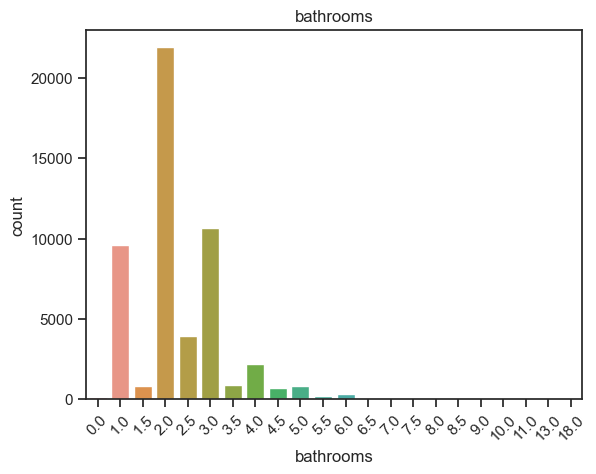

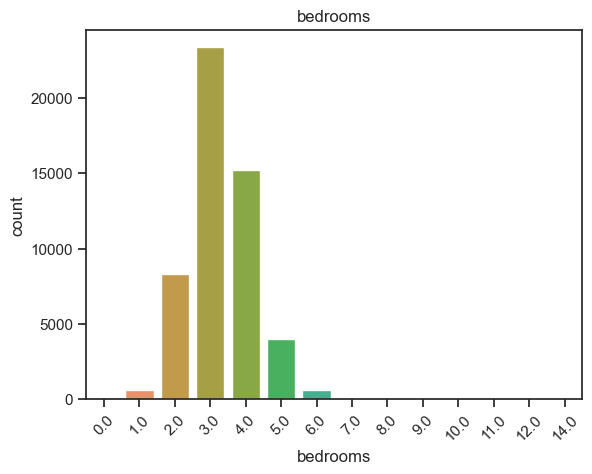

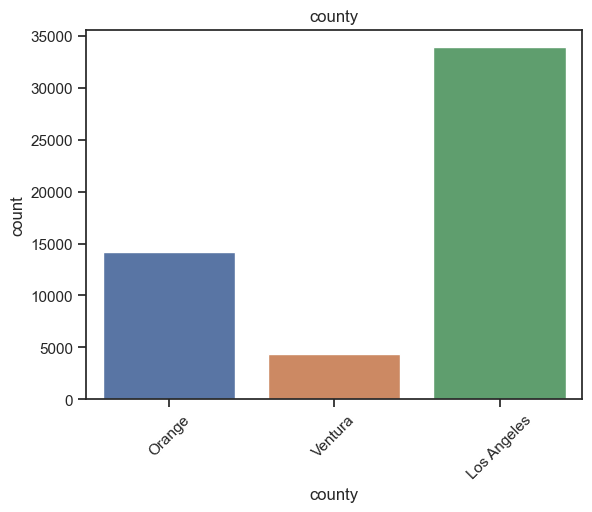

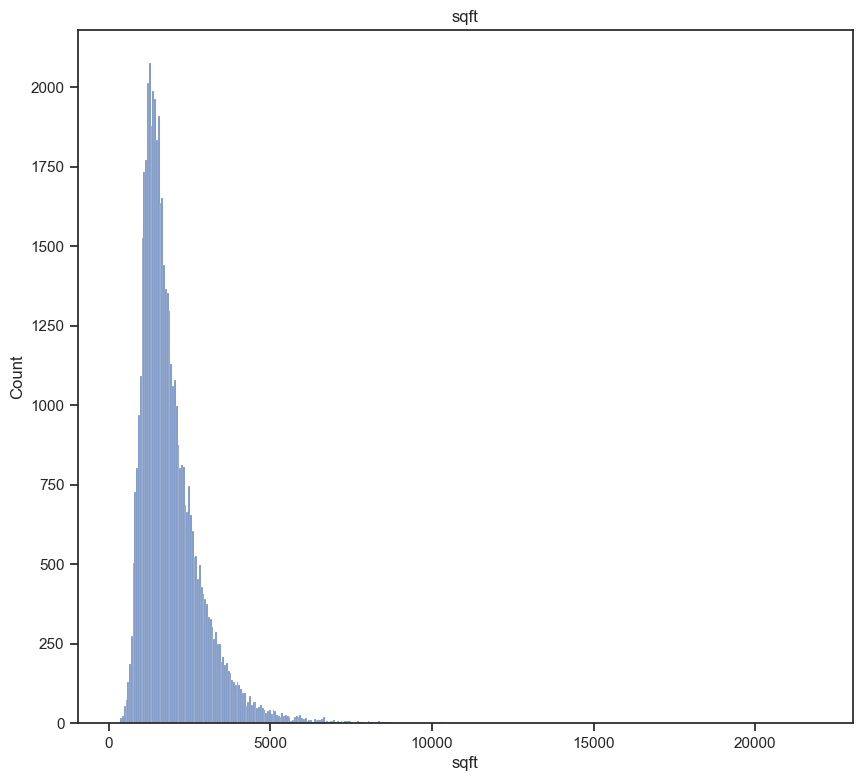

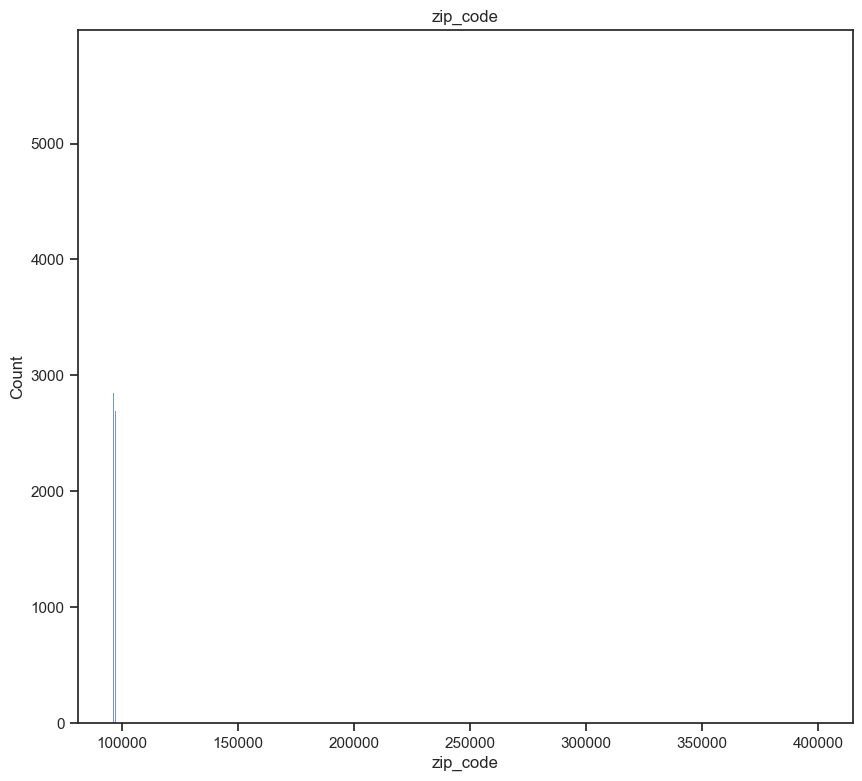

In [510]:
# create the list to store returned values
categorical_col = []
continuous_col = []

# create a for loop that iterates through each value in train dataframe
for col in pred_df:
    # appends the column name to categoriacl_col if there are less than 10 categories in column
    if pred_df[col].nunique() < 36:
        categorical_col.append(col)
    else: 
    # appends the column name to continuous_list if there are less than 10 categories in column
        continuous_col.append(col)

# create a for loop that iterates through each value in categorical_col
for feature in categorical_col:
    if feature != 'tax_value':
        # plots the points using the items(features) in the cat_list
        sns.countplot(x=feature, data=pred_df)
        plt.title(feature)
        plt.xticks(rotation=45)

    plt.show()
    
    
for feature in continuous_col:
    if feature != 'tax_value':
        plt.figure(figsize=(10, 9))
        sns.histplot(x=feature, data=pred_df)
        plt.title(feature)
        plt.show()

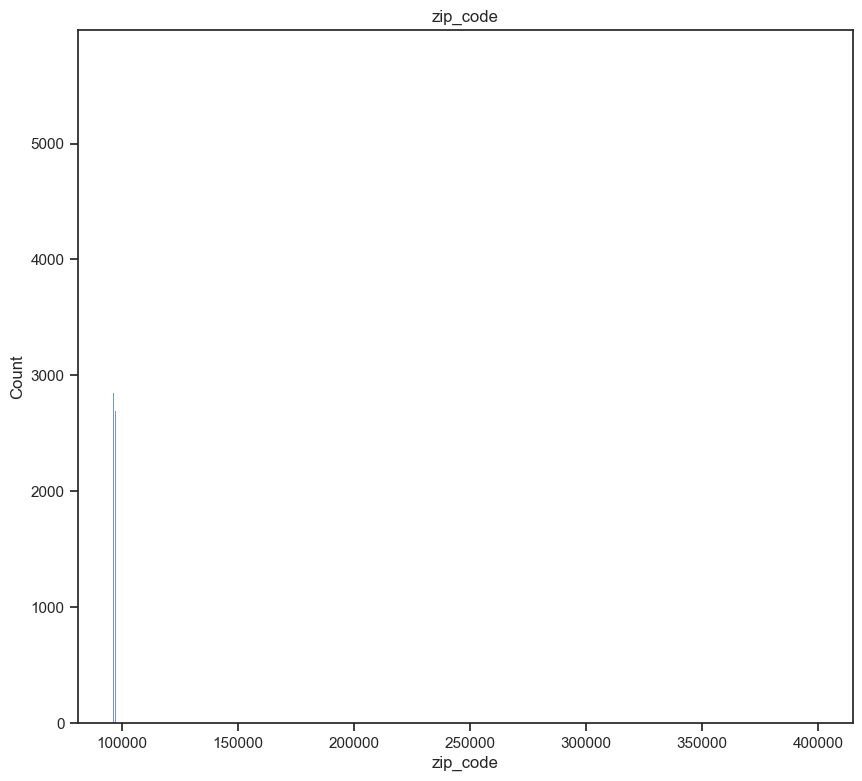

In [238]:

plt.figure(figsize=(10, 9))
sns.histplot(x='zip_code', data=pred_df)
plt.title('zip_code')
plt.show()

In [511]:
def plot_variable_pairs(df):
    sns.set(style="ticks")
    sns.pairplot(df, kind="reg", diag_kind="kde", plot_kws={"line_kws": {"color": "red"}})
    plt.show()

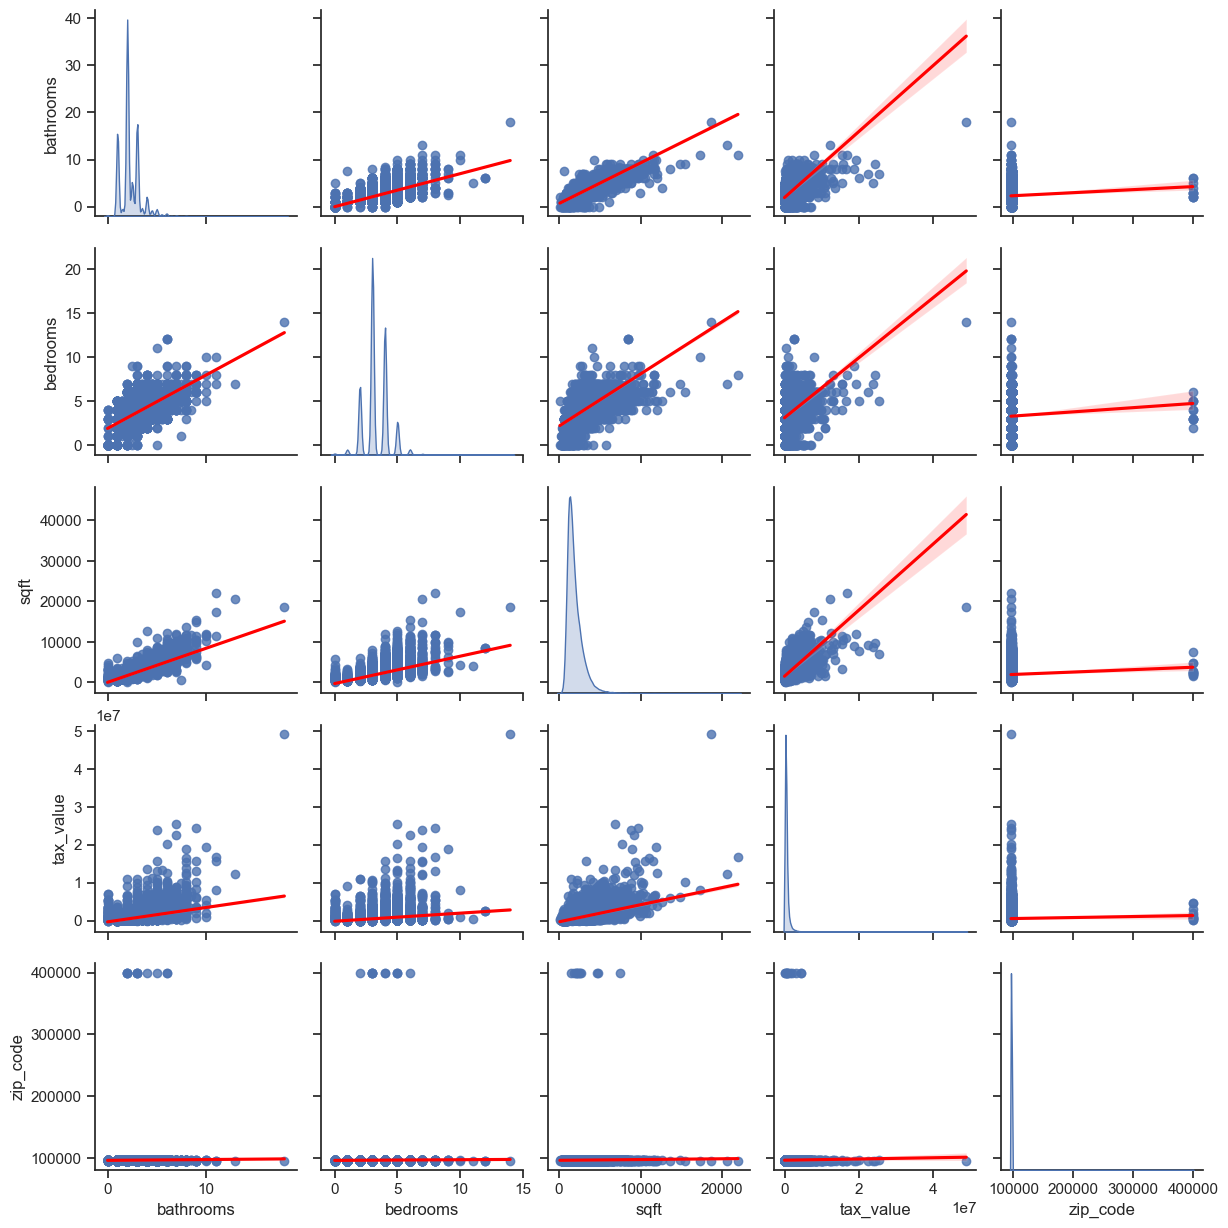

In [512]:
plot_variable_pairs(pred_df)

In [240]:
pred_df

,bathrooms,bedrooms,sqft,tax_value,zip_code,county
0,3.5,4.0,3100.0,1023282.0,96978.0,Orange
1,1.0,2.0,1465.0,464000.0,97099.0,Ventura
2,2.0,3.0,1243.0,564778.0,97078.0,Orange
3,3.0,4.0,2376.0,145143.0,96330.0,Los Angeles
4,3.0,4.0,2962.0,773303.0,96293.0,Los Angeles
...,...,...,...,...,...,...
52437,2.0,2.0,1286.0,354621.0,96284.0,Los Angeles
52438,2.0,4.0,1612.0,67205.0,97116.0,Ventura
52439,1.0,3.0,1032.0,49546.0,96480.0,Los Angeles
52440,2.0,3.0,1762.0,522000.0,96171.0,Los Angeles


<Axes: >

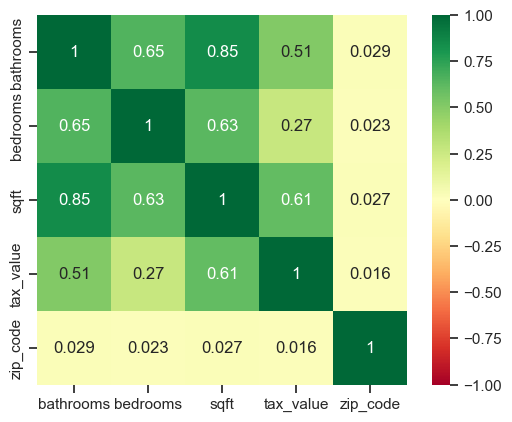

In [513]:
sns.heatmap(pred_df.corr(), annot=True, cmap='RdYlGn', vmin=-1, vmax=1, square=True)

# Why do some properties have a much higher value than others when they are located so close to each other?

In [514]:
pred_df.groupby('zip_code').tax_value.median()

zip_code
95982.0     187214.5
95983.0     190816.5
95984.0     181300.0
95985.0     724872.0
95986.0     938243.0
              ...   
97329.0     265257.5
97330.0     190848.0
97331.0     194000.0
97344.0     107478.0
399675.0    838897.5
Name: tax_value, Length: 381, dtype: float64

In [515]:
pred_df.groupby('county').tax_value.median()

county
Los Angeles    323583.0
Orange         472947.0
Ventura        442688.0
Name: tax_value, dtype: float64

In [516]:
column_list = pred_df.columns.tolist()

In [601]:
(pd.DataFrame(pred_df[pred_df['county'] == 'Orange']).tax_value.mean())

604685.171630704

In [522]:
(pd.DataFrame(pred_df[pred_df['county'] == 'Los Angeles']).tax_value.mean())

500236.1388045177

In [523]:
(pd.DataFrame(pred_df[pred_df['county'] == 'Ventura']).tax_value.mean())

515671.0002275313

In [585]:
ventura = pd.DataFrame(pred_df[pred_df['county'] == 'Ventura'].groupby('zip_code').mean().sort_values(by='tax_value'))
len(ventura)

28

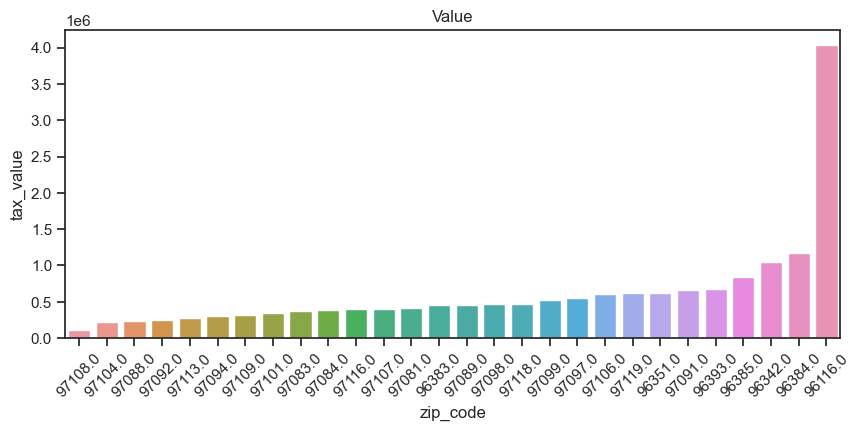

In [586]:
plt.figure(figsize=(10, 4))
sns.barplot(x=ventura.index, y='tax_value', data=ventura, order=ventura.index)
plt.title('Value')
plt.xticks(rotation=45)
plt.show()

# Los Angeles County Zip Codes

In [598]:
los_angeles = pd.DataFrame(pred_df[pred_df['county'] == 'Los Angeles'].groupby('zip_code').mean().sort_values(by='tax_value'))
len(los_angeles)


list_length = len(los_angeles)
part_size = list_length // 10
los_angeles1 = los_angeles.iloc[:part_size]
los_angeles2 = los_angeles.iloc[part_size:2 * part_size]
los_angeles3 = los_angeles.iloc[2 * part_size:3 * part_size]
los_angeles4 = los_angeles.iloc[3 * part_size:4 * part_size]
los_angeles5 = los_angeles.iloc[4 * part_size:5 * part_size]
los_angeles6 = los_angeles.iloc[5 * part_size:6 * part_size]
los_angeles7 = los_angeles.iloc[6 * part_size:7 * part_size]
los_angeles8 = los_angeles.iloc[7 * part_size:8 * part_size]
los_angeles9 = los_angeles.iloc[8 * part_size:9 * part_size]
los_angeles10 = los_angeles.iloc[9 * part_size:10 * part_size]


In [593]:
list_length // 10

27

In [599]:
la_county_zip_list =[los_angeles1,
                    los_angeles2,
                    los_angeles3 ,
                    los_angeles4,
                    los_angeles5 ,
                    los_angeles6,
                    los_angeles7,
                    los_angeles8 ,
                    los_angeles9,
                    los_angeles10]

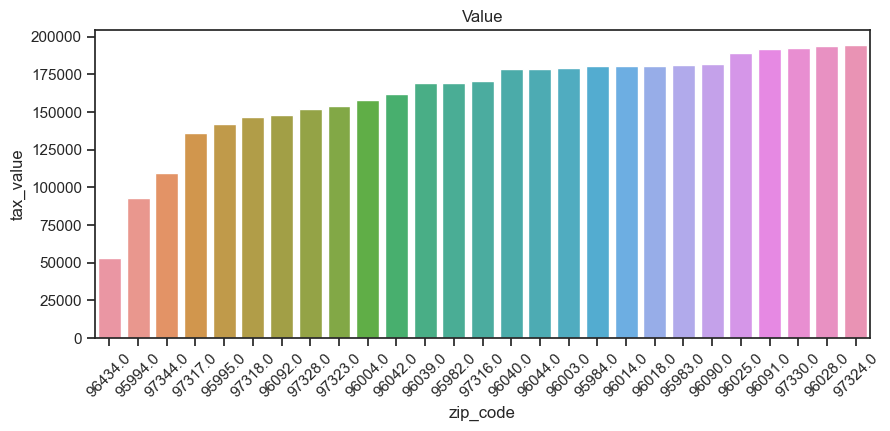

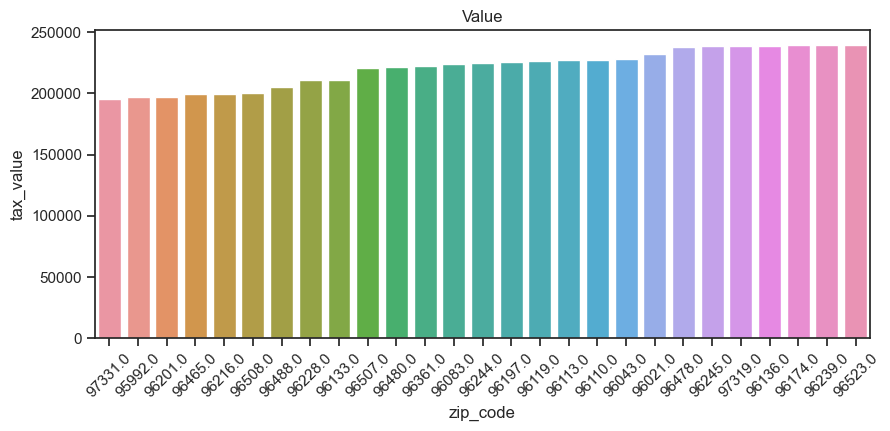

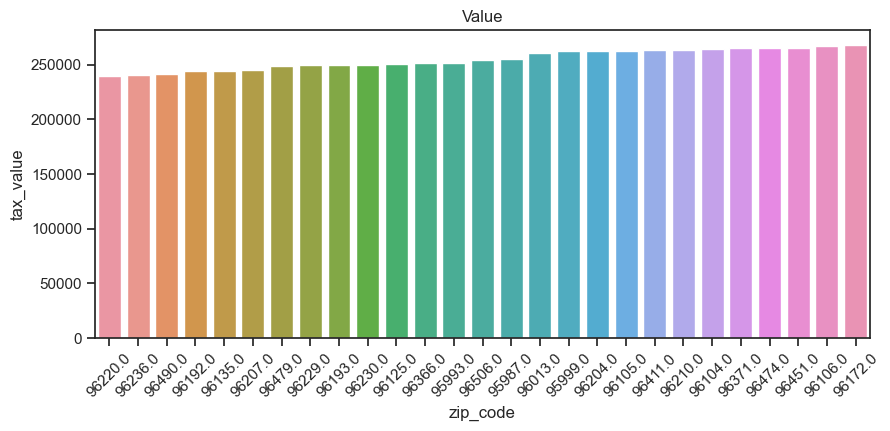

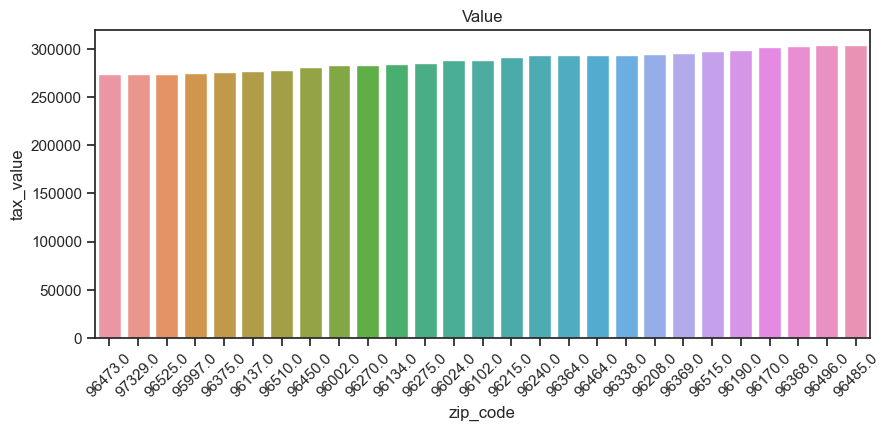

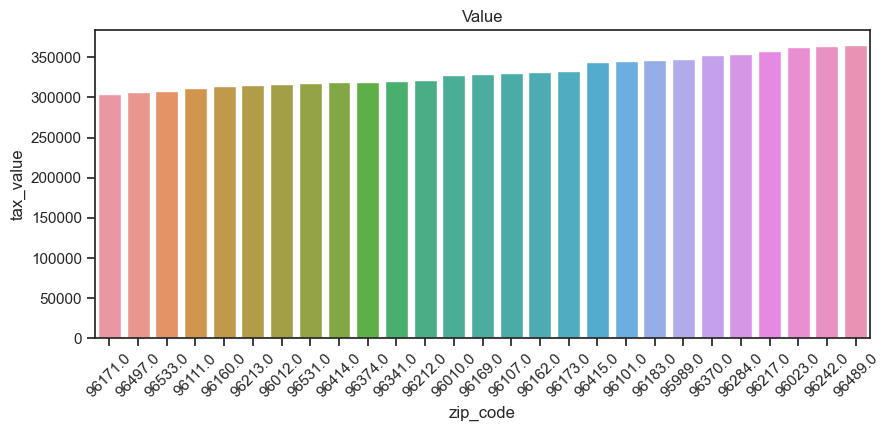

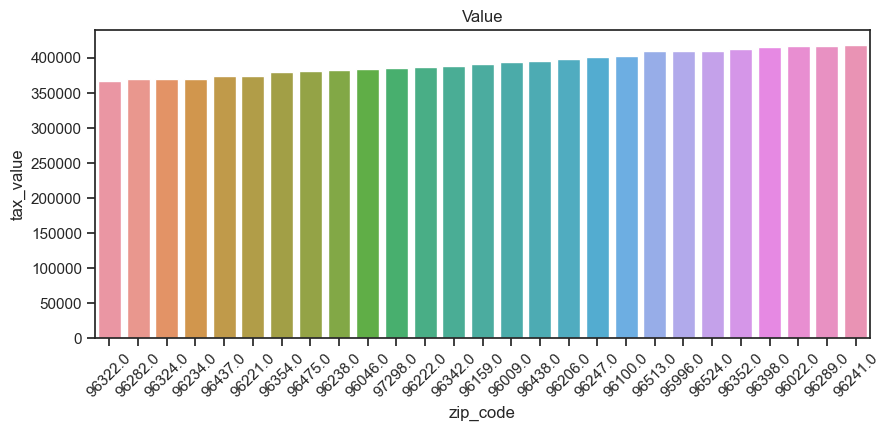

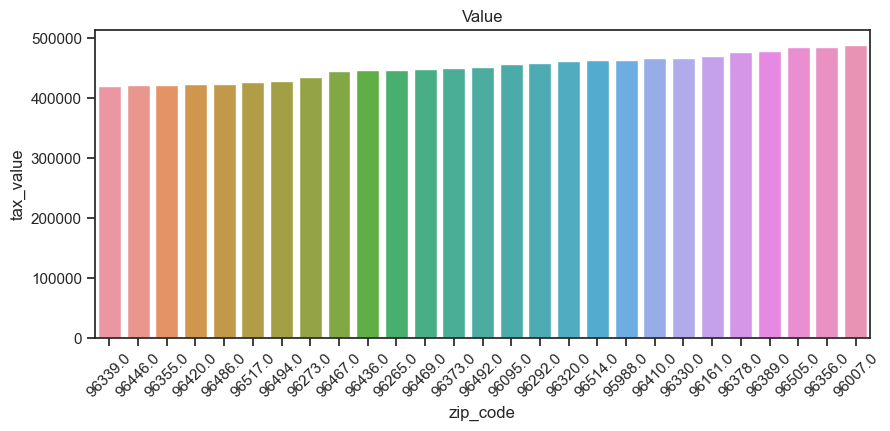

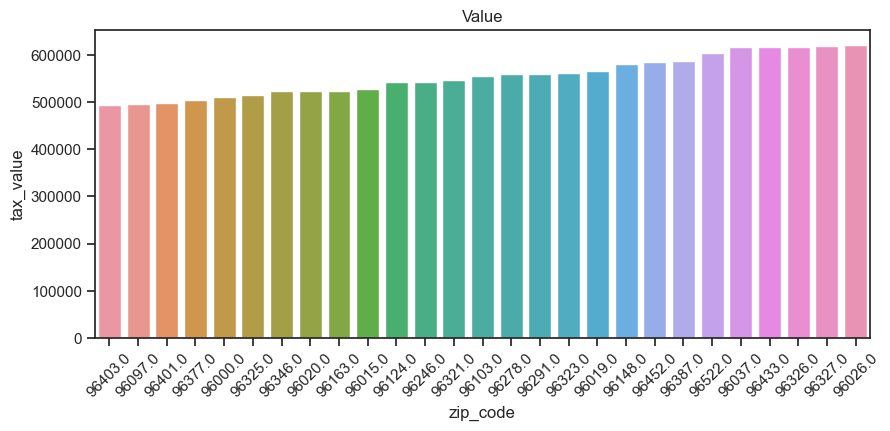

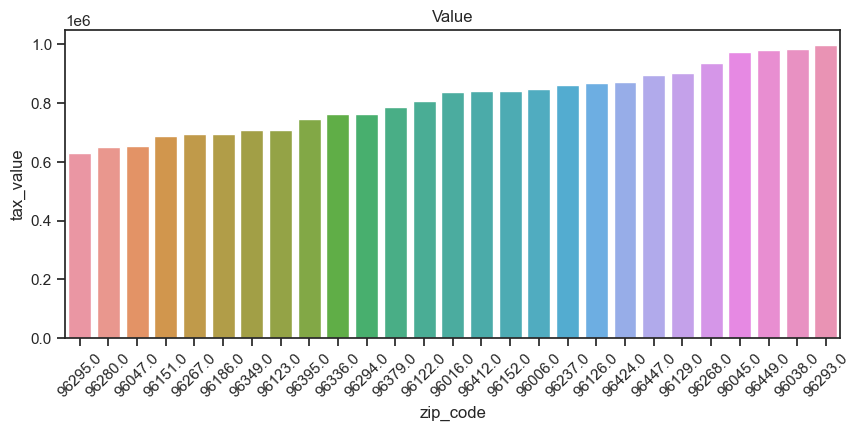

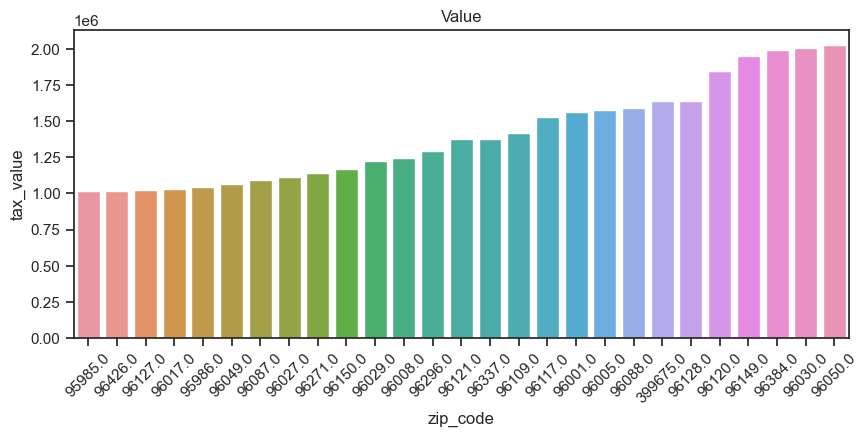

In [600]:
for df in la_county_zip_list:

    plt.figure(figsize=(10, 4))
    sns.barplot(x=df.index, y='tax_value', data=df, order=df.index)
    plt.title('Value')
    plt.xticks(rotation=45)
    plt.show()

# Orange County Zip Codes

In [590]:
orange = pd.DataFrame(pred_df[pred_df['county'] == 'Orange'].groupby('zip_code').mean().sort_values(by='tax_value'))


list_length = len(orange)
part_size = list_length // 3
orange1 = orange.iloc[:part_size]
orange2 = orange.iloc[part_size:2 * part_size]
orange3 = orange.iloc[2 * part_size:]

28

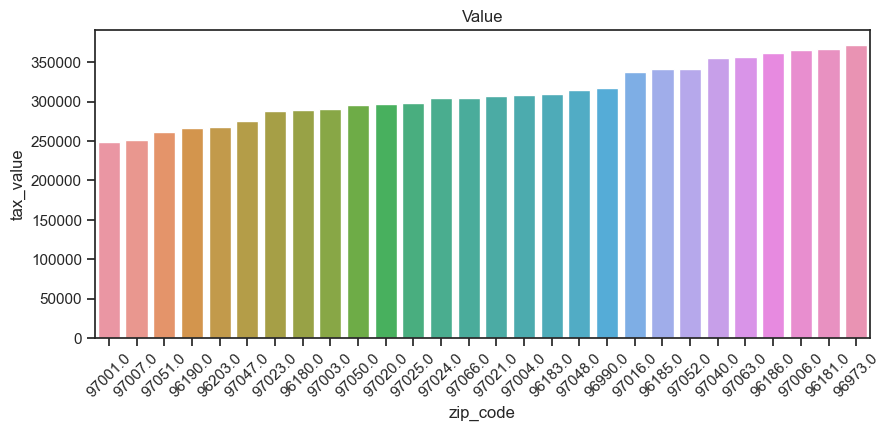

In [583]:
plt.figure(figsize=(10, 4))
sns.barplot(x=orange1.index, y='tax_value', data=orange1, order=orange1.index)
plt.title('Value')
plt.xticks(rotation=45)
plt.show()

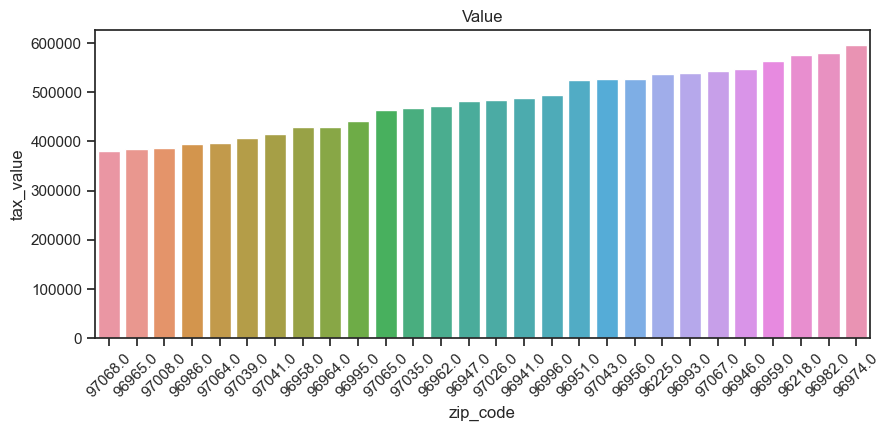

In [581]:
plt.figure(figsize=(10, 4))
sns.barplot(x=orange2.index, y='tax_value', data=orange2, order=orange2.index)
plt.title('Value')
plt.xticks(rotation=45)
plt.show()

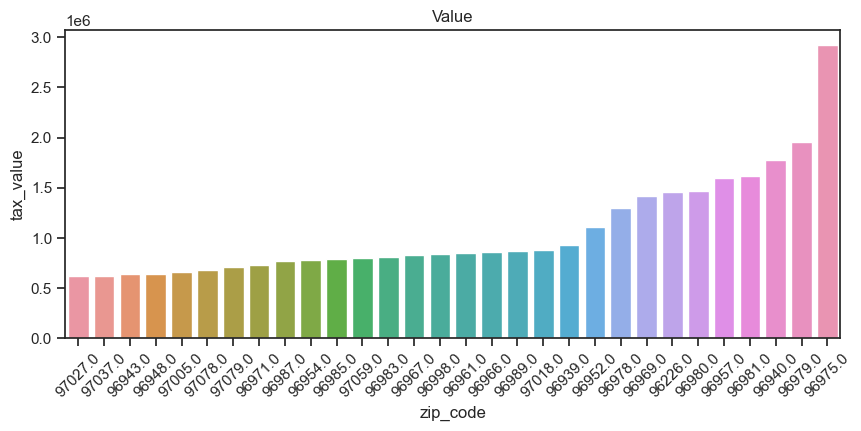

In [580]:
plt.figure(figsize=(10, 4))
sns.barplot(x=orange3.index, y='tax_value', data=orange3, order=orange3.index)
plt.title('Value')
plt.xticks(rotation=45)
plt.show()

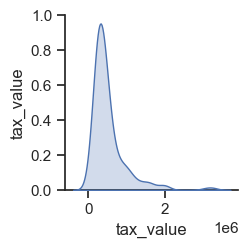

In [525]:
plot_variable_pairs(LA_df)


def plot_variable_pairs(df):
    sns.set(style="ticks")
    sns.pairplot(df, kind="reg", diag_kind="kde", plot_kws={"line_kws": {"color": "red"}})
    plt.show()

In [573]:
orange3

,bathrooms,bedrooms,sqft,tax_value
zip_code,,,,
97027.0,2.841912,3.558824,2415.051471,6.234479e+05
97037.0,2.930233,3.883721,2544.348837,6.235214e+05
96943.0,2.710526,3.929825,2152.298246,6.347185e+05
96948.0,2.554688,3.359375,2029.375000,6.428843e+05
97005.0,2.839216,3.878431,2734.834646,6.551149e+05
97078.0,2.828645,3.713555,2506.007732,6.745535e+05
97079.0,2.924837,3.673203,2761.236842,7.139583e+05
96971.0,2.874332,3.737968,2709.224599,7.265326e+05
96987.0,2.863636,3.458774,2499.225532,7.737454e+05


In [569]:

pd.DataFrame(pred_df[pred_df['county'] == 'Orange'].groupby('zip_code').mean().sort_values(by='tax_value'))

,bathrooms,bedrooms,sqft,tax_value
zip_code,,,,
97001.0,1.347826,2.673913,1251.173913,2.484725e+05
97007.0,1.542735,3.042735,1317.034188,2.512265e+05
97051.0,1.991071,3.035714,1442.000000,2.613628e+05
96190.0,2.375000,3.500000,1835.500000,2.670605e+05
96203.0,1.775862,2.977011,1299.206897,2.671758e+05
...,...,...,...,...
96957.0,2.789062,3.328125,2608.096000,1.592781e+06
96981.0,3.148438,3.679688,2704.000000,1.612850e+06
96940.0,3.796296,4.000000,3824.185185,1.775344e+06


In [568]:
orange

,bathrooms,bedrooms,sqft,tax_value
zip_code,,,,
97001.0,1.347826,2.673913,1251.173913,2.484725e+05
97007.0,1.542735,3.042735,1317.034188,2.512265e+05
97051.0,1.991071,3.035714,1442.000000,2.613628e+05
96190.0,2.375000,3.500000,1835.500000,2.670605e+05
96203.0,1.775862,2.977011,1299.206897,2.671758e+05
...,...,...,...,...
96957.0,2.789062,3.328125,2608.096000,1.592781e+06
96981.0,3.148438,3.679688,2704.000000,1.612850e+06
96940.0,3.796296,4.000000,3824.185185,1.775344e+06


In [560]:
orange1

,bathrooms,bedrooms,sqft,tax_value
zip_code,,,,
96180.0,1.944030,3.399254,1442.873134,2.888131e+05
96181.0,2.075893,3.169643,1706.044643,3.665785e+05
96183.0,2.328571,3.614286,1873.614286,3.098642e+05
96185.0,2.218631,3.631179,1782.034221,3.410432e+05
96186.0,2.192727,3.243636,1719.192727,3.614387e+05
96190.0,2.375000,3.500000,1835.500000,2.670605e+05
96203.0,1.775862,2.977011,1299.206897,2.671758e+05
96218.0,2.411348,3.588652,2186.680851,5.752110e+05
96225.0,2.426316,3.600000,1968.884211,5.378642e+05


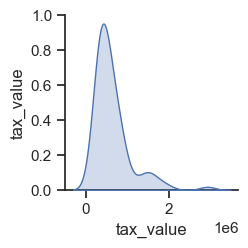

In [526]:
plot_variable_pairs(OR_df)

In [603]:
#TRY AN OLS, LASSOLARS, TWEEDIE, POLYNOMIAL, AND GLM MODEL ON YOUR PREDICTORS AND TARGET, 
#APPEND THE RESULTS TO A DATAFRAME, THEN COMPARE MODELS

#OLS
# MAKE THE THING: create the model object
OLSmodel = LinearRegression()


#1. FIT THE THING: fit the model to training data
OLSmodel.fit(X_train, y_train.tax_value)


#2. USE THE THING: make a prediction
y_train['value_pred_ols'] = OLSmodel.predict(X_train)


#3. Evaluate: RMSE
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_ols) **.5


#4. REPEAT STEPS 2-3

# predict validate
y_validate['value_pred_ols'] = OLSmodel.predict(X_validate)


# evaluate: RMSE
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_ols) ** .5
print(f'''RMSE for OLS
_____________________
Training/In-Sample: {rmse_train},
Validation/Out-of-Sample:  {rmse_validate}
Difference:  {rmse_validate - rmse_train}''')

#append to your results df


#LASSOLARS
# MAKE THE THING: create the model object
OLSmodel = LinearRegression()


#1. FIT THE THING: fit the model to training data
OLSmodel.fit(X_train, y_train.tax_value)


#2. USE THE THING: make a prediction
y_train['value_pred_ols'] = OLSmodel.predict(X_train)


#3. Evaluate: RMSE
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_ols) **.5


#4. REPEAT STEPS 2-3

# predict validate
y_validate['value_pred_ols'] = OLSmodel.predict(X_validate)


# evaluate: RMSE
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_ols) ** .5
print(f'''RMSE for OLS
_____________________
Training/In-Sample: {rmse_train},
Validation/Out-of-Sample:  {rmse_validate}
Difference:  {rmse_validate - rmse_train}''')

#append to your results df


#TWEEDIE
# MAKE THE THING: create the model object
OLSmodel = LinearRegression()


#1. FIT THE THING: fit the model to training data
OLSmodel.fit(X_train, y_train.tax_value)


#2. USE THE THING: make a prediction
y_train['value_pred_ols'] = OLSmodel.predict(X_train)


#3. Evaluate: RMSE
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_ols) **.5


#4. REPEAT STEPS 2-3

# predict validate
y_validate['value_pred_ols'] = OLSmodel.predict(X_validate)


# evaluate: RMSE
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_ols) ** .5
print(f'''RMSE for OLS
_____________________
Training/In-Sample: {rmse_train},
Validation/Out-of-Sample:  {rmse_validate}
Difference:  {rmse_validate - rmse_train}''')

#append to your results df


#GLM
# MAKE THE THING: create the model object
OLSmodel = LinearRegression()


#1. FIT THE THING: fit the model to training data
OLSmodel.fit(X_train, y_train.tax_value)


#2. USE THE THING: make a prediction
y_train['value_pred_ols'] = OLSmodel.predict(X_train)


#3. Evaluate: RMSE
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_ols) **.5


#4. REPEAT STEPS 2-3

# predict validate
y_validate['value_pred_ols'] = OLSmodel.predict(X_validate)


# evaluate: RMSE
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_ols) ** .5
print(f'''RMSE for OLS
_____________________
Training/In-Sample: {rmse_train},
Validation/Out-of-Sample:  {rmse_validate}
Difference:  {rmse_validate - rmse_train}''')

#append to your results df


#POLYNOMIAL
poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train)

X_validate_poly = poly.transform(X_validate)

# Fit the polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train.tax_value)

# Make predictions on training set
y_train['value_pred_poly'] = poly_reg.predict(X_train_poly)
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_poly) ** 0.5

# Make predictions on validation set
y_validate['value_pred_poly'] = poly_reg.predict(X_validate_poly)
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_poly) ** 0.5

# Print the RMSE results
print(f'''RMSE for Polynomial Regression
_____________________
Training/In-Sample: {rmse_train},
Validation/Out-of-Sample: {rmse_validate}
Difference: {rmse_validate - rmse_train}''')

#append to your results df

NameError: name 'X_train' is not defined